In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle

from safe_control_gym.lyapunov.lyapunov import GridWorld
from safe_control_gym.lyapunov.utilities import *

# only plot inline
%matplotlib inline


/home/tumeilsy-mo-10/anaconda3/envs/safe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dim_grid = 4
grid_constraints = np.array([0.5, 1.5, 1.57, 1.57])
# grid_constraints = np.array([1, 0.3, 0.2])
grid_constraints = np.vstack((-1 * grid_constraints, \
                                    grid_constraints)).T
# grid_constraints_ub = np.array([grid_constraints[0], -0.1, grid_constraints[2]])
# grid_constraints = np.vstack((-1 * grid_constraints, \
#                                     grid_constraints_ub)).T

prec = [11, 31, 31, 31]
# prec = [2, 2, 2]
grids = gridding(dim_grid, grid_constraints, prec)
# print discretized points
print(grids.discrete_points[0])
print(grids.discrete_points[1])
print(grids.discrete_points[2])
print(grids.discrete_points[1][10])

Grid size: 327701
Discretization constant (tau): 0.0
[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
[-1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2
 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2
  1.3  1.4  1.5]
[-1.57       -1.4653333  -1.3606668  -1.256      -1.1513333  -1.0466667
 -0.94200003 -0.8373334  -0.7326667  -0.628      -0.5233334  -0.4186667
 -0.314      -0.20933335 -0.10466667  0.          0.10466667  0.20933335
  0.314       0.4186667   0.5233334   0.628       0.7326667   0.8373334
  0.94200003  1.0466667   1.1513333   1.256       1.3606668   1.4653333
  1.57      ]
-0.5


In [3]:
m = 0.1
l = 0.5

colors = [None] * 4
colors[0] = 'orange' # small
colors[1] = 'blue' # true
colors[2] = 'cyan' # large

In [4]:
# load M = 0.2 data
M = 0.2
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])

# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result_M_200 = json.load(f)
    
ROA_M_small_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result_M_200):
    ROA_M_small_data[result['idx']] = result['goal_reached']


In [5]:
ROA_M_small = ROA_M_small_data.reshape(grids.num_points)
# ROA_M_true = ROA_M_true_data.reshape(grids.num_points)

# ROA_M_large.shape
# print('ROA_M_true.shape', ROA_M_true.shape)
print('ROA_M_small.shape', ROA_M_small.shape)

ROA_M_small.shape (11, 31, 31, 31)


In [6]:
# take a random slice at the snd dimension
# slice_idx = np.random.randint(1, grids.num_points[0])
# ROA_M_large_slice = ROA_M_large[:, slice_idx, :]
# ROA_M_true_slice = ROA_M_true[:, slice_idx, :]
# ROA_M_true_slice = ROA_M_small[:, slice_idx, :]

# slice_idx = np.random.randint(0, grids.num_points[1])
x_slice_idx = 5
theta_slice_idx = 11
print('x_slice_idx: ', x_slice_idx)
print('theta_slice_idx: ', theta_slice_idx)
# ROA_M_true_slice = ROA_M_true[x_slice_idx, :, theta_slice_idx, :]
ROA_M_small_slice = ROA_M_small[x_slice_idx, :, theta_slice_idx, :]
# print('ROA_M_true_slice.shape: ', ROA_M_true_slice.shape)
# print('ROA_M_small_slice: ', ROA_M_small_slice)
# print('ROA_M_true_slice: ', ROA_M_true_slice)
# print('ROA_M_large_slice: ', ROA_M_large_slice)

# get the corresponding x and theta
x_slice_at = grids.discrete_points[0][x_slice_idx]
theta_slice_at = grids.discrete_points[2][theta_slice_idx]
print('x_slice: ', x_slice_at)
print('theta_slice: ', theta_slice_at)

x_slice_idx:  5
theta_slice_idx:  11
x_slice:  0.0
theta_slice:  -0.4186667


In [7]:
# take a random slice at the snd dimension
# slice_idx = np.random.randint(1, grids.num_points[0])
# ROA_M_large_slice = ROA_M_large[:, slice_idx, :]
# ROA_M_true_slice = ROA_M_true[:, slice_idx, :]
# ROA_M_small_slice = ROA_M_small[:, slice_idx, :]

# slice_idx = np.random.randint(0, grids.num_points[1])
x_slice_idx = 5
# theta_slice_idx = 11
print('x_slice_idx: ', x_slice_idx)
# get the corresponding x and theta
x_slice_at = grids.discrete_points[0][x_slice_idx]
# theta_slice_at = grids.discrete_points[2][theta_slice_idx]
print('x_slice: ', x_slice_at)
# print('theta_slice: ', theta_slice_at)

# print('theta_slice_idx: ', theta_slice_idx)
# ROA_M_true_3D_slice = ROA_M_true[x_slice_idx, :, :, :]
ROA_M_small_3D_slice = ROA_M_small[x_slice_idx, :, :, :]
# print('ROA_M_small_3D_slice: ', ROA_M_small_3D_slice)

# get the corresponding points in the slice whose value is 1
# ROA_M_true_3D_slice_idx = np.argwhere(ROA_M_true_3D_slice)
ROA_M_small_3D_slice_idx = np.argwhere(ROA_M_small_3D_slice)

# add x_slice_idx to the first dimension
# ROA_M_true_3D_slice_idx = np.hstack((x_slice_idx * np.ones((ROA_M_true_3D_slice_idx.shape[0], 1)), ROA_M_true_3D_slice_idx))
ROA_M_small_3D_slice_idx = np.hstack((x_slice_idx * np.ones((ROA_M_small_3D_slice_idx.shape[0], 1)), ROA_M_small_3D_slice_idx))

# make the index to be integer
# ROA_M_true_3D_slice_idx = ROA_M_true_3D_slice_idx.astype(int)
ROA_M_small_3D_slice_idx = ROA_M_small_3D_slice_idx.astype(int)

# get the corresponding state in the grid
def get_state_from_axis_idx(axis_idx, grids):
    state = []
    for i in range(len(axis_idx)):
        state.append(grids.discrete_points[i][axis_idx[i]])
    state = np.array(state)
    return state

# ROA_M_true_3D_slice_state = np.zeros((ROA_M_true_3D_slice_idx.shape[0], 4))
# for i in range(ROA_M_true_3D_slice_idx.shape[0]):
#     ROA_M_true_3D_slice_state[i, :] = get_state_from_axis_idx(ROA_M_true_3D_slice_idx[i, :], grids)

ROA_M_small_3D_slice_state = np.zeros((ROA_M_small_3D_slice_idx.shape[0], 4))
for i in range(ROA_M_small_3D_slice_idx.shape[0]):
    ROA_M_small_3D_slice_state[i, :] = get_state_from_axis_idx(ROA_M_small_3D_slice_idx[i, :], grids)


x_slice_idx:  5
x_slice:  0.0


len(ROA_M_small_idx):  119
ROA_M_small_idx:  [133100, 133127, 133978, 134005, 134087, 134114, 134141, 134168, 134939, 134966, 134993, 135020, 135102, 135129, 142710, 142737, 142738, 143588, 143615, 143642, 143643, 143669, 143670, 143697, 143724, 143751, 143778, 144521, 144549, 144576, 144603, 144630, 144657, 144684, 144712, 144739, 153225, 153252, 153253, 153279, 153280, 153281, 153306, 153307, 153388, 154131, 154158, 154186, 154213, 154240, 154267, 154294, 154321, 154349, 162888, 162889, 162890, 162916, 163741, 163768, 163796, 163823, 163849, 163850, 163851, 163877, 163904, 163931, 163959, 173351, 173378, 173432, 173433, 173458, 173459, 173460, 173486, 173487, 173514, 173541, 174393, 174420, 182961, 182988, 183015, 183042, 183070, 183097, 183124, 183151, 183949, 183976, 184002, 184003, 184029, 184030, 184057, 191637, 191664, 191800, 192571, 192598, 192625, 192707, 192734, 192761, 193586, 193613, 193640, 193667, 193694, 194572, 201247, 201274, 201301, 201328, 201355, 201410, 202208]
RO

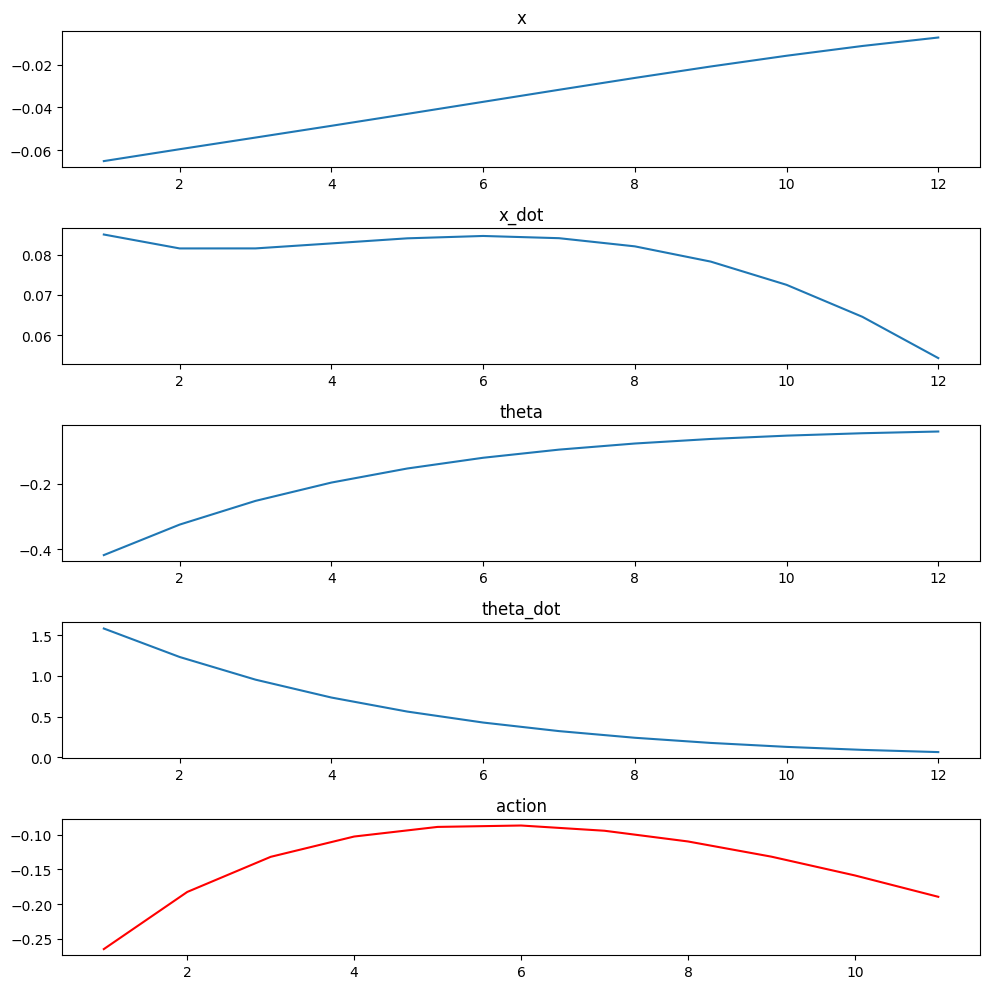

In [8]:
# get all idx that goal is reached
ROA_M_small_idx = []
# stack state if goal is reached

for i in range(len(grids.all_points)):
    if result_M_200[i]['goal_reached']:
        ROA_M_small_idx.append(i)        
print('len(ROA_M_small_idx): ', len(ROA_M_small_idx))
ROA_M_small_state = np.zeros((len(ROA_M_small_idx), 4))
for i in range(len(ROA_M_small_idx)):
    ROA_M_small_state[i, :] = result_M_200[ROA_M_small_idx[i]]['obs'][0]

print('ROA_M_small_idx: ', ROA_M_small_idx)

# random sample one from the idx
ROA_M_small_idx_sample = np.random.choice(ROA_M_small_idx, 1)
print('ROA_M_small_idx_sample: ', ROA_M_small_idx_sample)
print('len(result_M_200[ROA_M_small_idx_sample[0]][obs]'), \
        len(result_M_200[ROA_M_small_idx_sample[0]]['obs'])
traj_list = result_M_200[ROA_M_small_idx_sample[0]]['obs']
traj = np.array(traj_list)
print('shape of traj: ', traj.shape)
action = result_M_200[ROA_M_small_idx_sample[0]]['action']
iter = len(traj)
print('len(traj): ', len(traj))

# plot the trajectory and action on a 5 x 1 plot
# use 1:iter as x-axis
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
ax[0].plot(range(1, iter+1), traj[:,0], label='x')
ax[0].set_title('x')
ax[1].plot(range(1, iter+1), traj[:,1], label='x_dot')
ax[1].set_title('x_dot')
ax[2].plot(range(1, iter+1), traj[:,2], label='theta')
ax[2].set_title('theta')
ax[3].plot(range(1, iter+1), traj[:,3], label='theta_dot')
ax[3].set_title('theta_dot')
ax[4].plot(range(1, iter), action, label='action', c='r')
ax[4].set_title('action')
fig.tight_layout()
plt.show()


# print('type(result)', type(result))
# print('len(result)', len(result))
# print('result[0]', result[0])
# print('type(result[0][obs]', type(result[0]['obs']))
# print('len(result[0][obs]', len(result[0]['obs']))
# print(result[0]['obs'][0])
# ROA_M_small_obs = np.zeros([len(result), 4, len(grids.all_points)])
# ROA_M_small_action = np.zeros([len(result), 1, len(grids.all_points)])

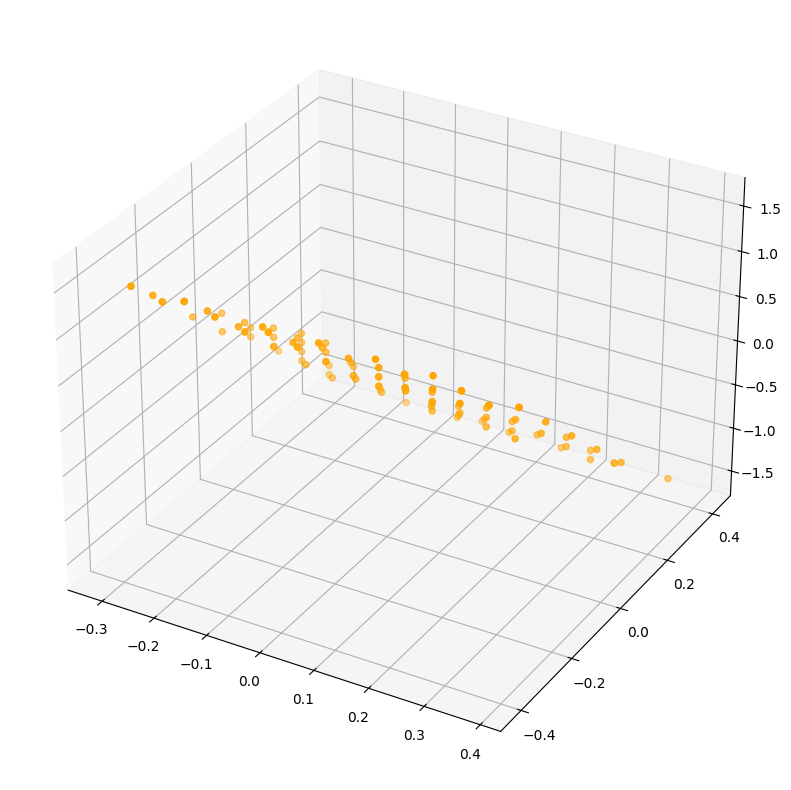

In [9]:
ROA_M_small_idx = []
# stack state if goal is reached
for i in range(len(grids.all_points)):
    if result_M_200[i]['goal_reached']:
        ROA_M_small_idx.append(i)     
# get the first observation of each obs
ROA_small_init = np.zeros([len(ROA_M_small_idx), 4])
for i in range(len(ROA_M_small_idx)):
    ROA_small_init[i, :] = result_M_200[ROA_M_small_idx[i]]['obs'][0]
# print('ROA_small_init: ', ROA_small_init)

# ROA_small_end = np.zeros([len(ROA_M_small_idx), 4])
# for i in range(len(ROA_M_small_idx)):
#     ROA_small_end[i, :] = result_M_200[ROA_M_small_idx[i]]['obs'][-1]
# # print('ROA_small_end: ', ROA_small_end)
# # check whether the norm of the state is smaller than 0.1
# norm_small_end = np.linalg.norm(ROA_small_end, axis=1)
# print('norm_small_end: ', norm_small_end)
    
# plot all the points (3D) without the first dimension
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ROA_small_init[:, 1], ROA_small_init[:, 2], ROA_small_init[:, 3], \
           c=colors[0], marker='o')
pickle.dump(fig, open('ROA_data/ROA_small_wo_first.pickle', 'wb'))

In [10]:
# load M = 1.0 data
M = 1.0
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])

# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result_M_1000 = json.load(f)

ROA_M_true_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result_M_1000):
    ROA_M_true_data[result['idx']] = result['goal_reached'] 

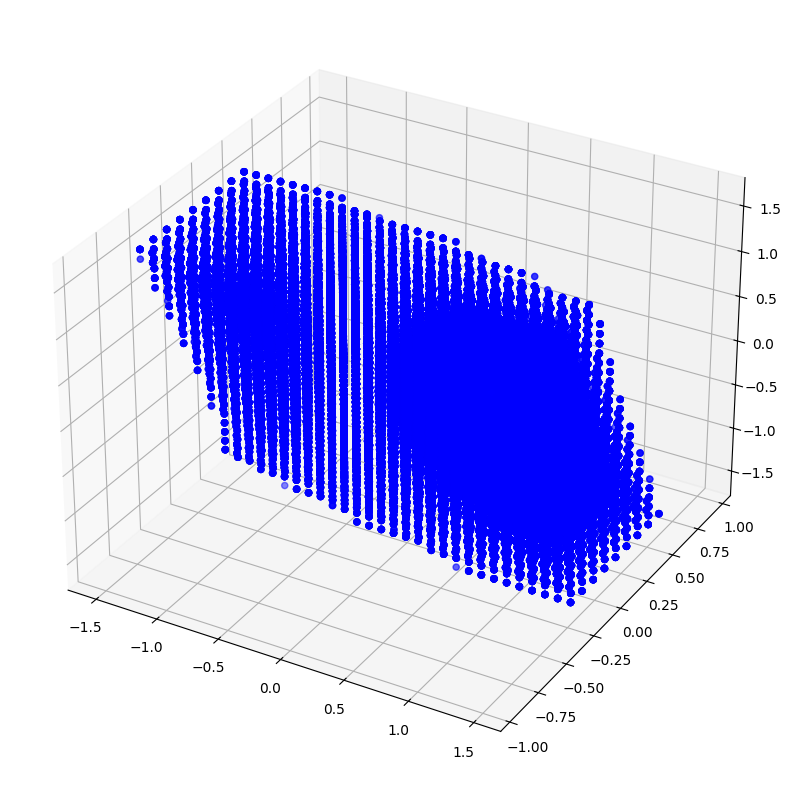

In [11]:
ROA_M_true_idx = []
# stack state if goal is reached
for i in range(len(grids.all_points)):
    if result_M_1000[i]['goal_reached']:
        ROA_M_true_idx.append(i)     
# get the first observation of each obs
ROA_true_init = np.zeros([len(ROA_M_true_idx), 4])
for i in range(len(ROA_M_true_idx)):
    ROA_true_init[i, :] = result_M_1000[ROA_M_true_idx[i]]['obs'][0]
# print('ROA_small_init: ', ROA_small_init)
    
# plot all the points (3D) without the first dimension
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ROA_true_init[:, 1], ROA_true_init[:, 2], ROA_true_init[:, 3], \
           c=colors[1], marker='o')
pickle.dump(fig, open('ROA_data/ROA_true_wo_first.pickle', 'wb'))

In [13]:
# load M = 1.8 data
M = 1.8
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])
# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result_M_1800 = json.load(f)

ROA_M_large_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result_M_1000):
    ROA_M_large_data[result['idx']] = result['goal_reached']

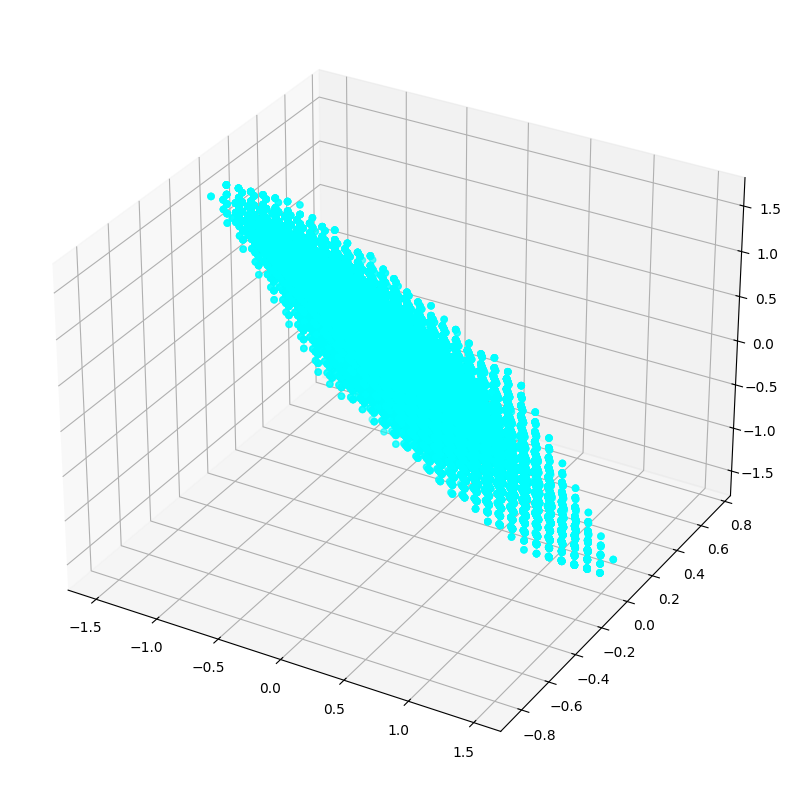

In [15]:
ROA_M_large_idx = []
# stack state if goal is reached
for i in range(len(grids.all_points)):
    if result_M_1800[i]['goal_reached']:
        ROA_M_large_idx.append(i)     
# get the first observation of each obs
ROA_large_init = np.zeros([len(ROA_M_large_idx), 4])
for i in range(len(ROA_M_large_idx)):
    ROA_large_init[i, :] = result_M_1000[ROA_M_large_idx[i]]['obs'][0]
# print('ROA_small_init: ', ROA_small_init)
    
# plot all the points (3D) without the first dimension
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ROA_large_init[:, 1], ROA_large_init[:, 2], ROA_large_init[:, 3], \
           c=colors[2], marker='o')
pickle.dump(fig, open('ROA_data/ROA_large_wo_first.pickle', 'wb'))

In [1]:
# plot all 3D scatter
dpi = 200
fig = plt.figure(figsize=(8, 3), dpi=dpi, frameon=False)
ax = fig.add_subplot(131, projection='3d')
ax.scatter(ROA_small_init[:, 1], ROA_small_init[:, 2], ROA_small_init[:, 3], \
              c=colors[0], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.set_title('M = 0.2')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(ROA_true_init[:, 1], ROA_true_init[:, 2], ROA_true_init[:, 3], \
              c=colors[1], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.set_title('M = 1.0 (true)')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(ROA_large_init[:, 1], ROA_large_init[:, 2], ROA_large_init[:, 3], \
              c=colors[2], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.set_title('M = 1.8')

# fig.tight_layout()
# add title
fig.suptitle('3D scatter plot of ROA (disregarding cart position)', fontsize=12)
pickle.dump(fig, open('ROA_data/ROA_3D_wo_first.pickle', 'wb'))

NameError: name 'plt' is not defined